In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
#pulling in data, storing as variable df
df = pd.read_csv(r'C:\Users\emily\Documents\School\Sp22\Machine Learning\Homework\HW3\UCI_credit_card.csv')
#looking at first few rows to see what the data looks like
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
#looking at stats to get a feel for the data. Transposing so the variables are listed in rows instead of columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


We don't need the client IDs, so let's remove that column


In [4]:
#deleting unneeded ID column
df.drop(labels = "ID", axis=1, inplace=True)

In [5]:
#checking first few rows of data to make sure column was deleted correctly
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Column was deleted correctly.

In [6]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

It looks like we need to reclassify the following variables to categorical: sex, education, marriage, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, and default.payment.next.month.

In [7]:
categoricals = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5','PAY_6','default.payment.next.month']

for col in categoricals:
    df[col] = df[col].astype('category')

In [8]:
#checking that variable types were updated correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   LIMIT_BAL                   30000 non-null  float64 
 1   SEX                         30000 non-null  category
 2   EDUCATION                   30000 non-null  category
 3   MARRIAGE                    30000 non-null  category
 4   AGE                         30000 non-null  int64   
 5   PAY_0                       30000 non-null  category
 6   PAY_2                       30000 non-null  category
 7   PAY_3                       30000 non-null  category
 8   PAY_4                       30000 non-null  category
 9   PAY_5                       30000 non-null  category
 10  PAY_6                       30000 non-null  category
 11  BILL_AMT1                   30000 non-null  float64 
 12  BILL_AMT2                   30000 non-null  float64 
 13  BILL_AMT3       

Everything looks good here! Moving on:

In [9]:
#check for N/A and blank cells

df.isna().sum()


LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

There is no missing data so this doesn't need to be resolved.

Let's rename two variables: <br>
default.payment.next.month is a long, annoying name. Let's rename it 'def_pay' <br>
update PAY_0 to PAY_1 so that it flows with the rest of the dataset (there is no PAY_1, and the bill amount and pay amounts are both 1-6)

In [10]:
df.rename(columns={'default.payment.next.month':'def_pay'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

It looks like the data is all clean now! We're good to move on.

Let's start getting a feel of what the data looks like.

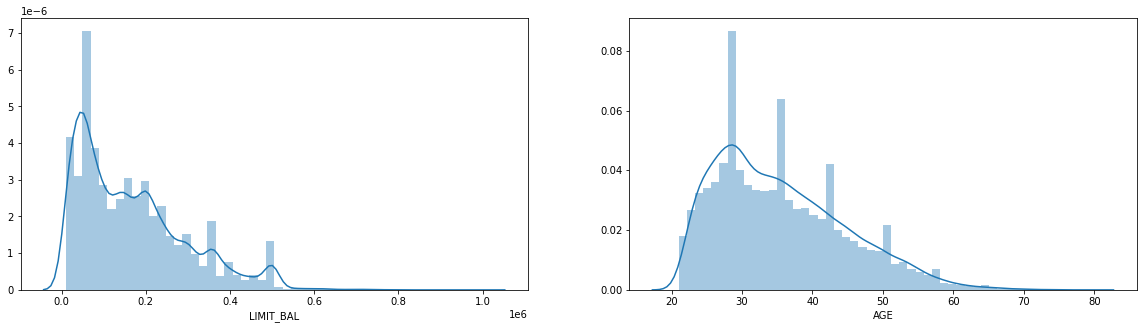

In [11]:
#plotting the distributions for credit limit (left) and age (right)

plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df.LIMIT_BAL)

plt.subplot(122)
sns.distplot(df.AGE)

plt.show()

Note for the credit balance plot: the limits listed are in millions of dollars, I'm not savvy enough to know how to change it!

As is shown in the graphs above, both the credit limits and ages are right skewed. The majority of people have credit limits below $200,000. Most of them are between 20 and 40 years old. 

Let's combine the people into bins based on their age group. This will make it easier to analyze trends across the different age groups.

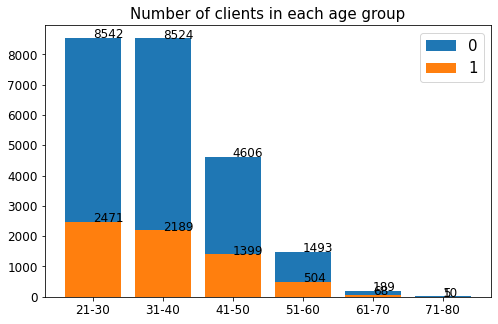

In [12]:
#creating a variable for age ranges
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df['AGE_BIN'] = pd.cut(x=df.AGE, bins=bins, labels=names, right=True)

#counting total number of individuals in each age group, sorting them based on if they are expected to default or not.
age_cnt = df.AGE_BIN.value_counts()
age_0 = (df.AGE_BIN[df['def_pay'] == 0].value_counts())
age_1 = (df.AGE_BIN[df['def_pay'] == 1].value_counts())

#create plot that shows distribution of individuals across the age ranges, with the amount in each group that is expected to default versus not
plt.subplots(figsize=(8,5))
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

This graph shows the age distribution of the individuals in the dataset, split into groups of 10 years each. The total bar amount for each group is the total number of individuals in that group, while the blue portion is the number of individuals who are not predicted to default on their loans and the orange portion is the number of individuals who are predicted to default. <br>
From the graph, we can see that the group of clients between the ages of 21-30 has the highest number of total individuals, as well as number who are expected to default. The age group of 31-40 is the next highest for both, but only slightly lower. The remaining groups have significantly fewer individuals.

Let's check the default risk distribution separated by marital status.

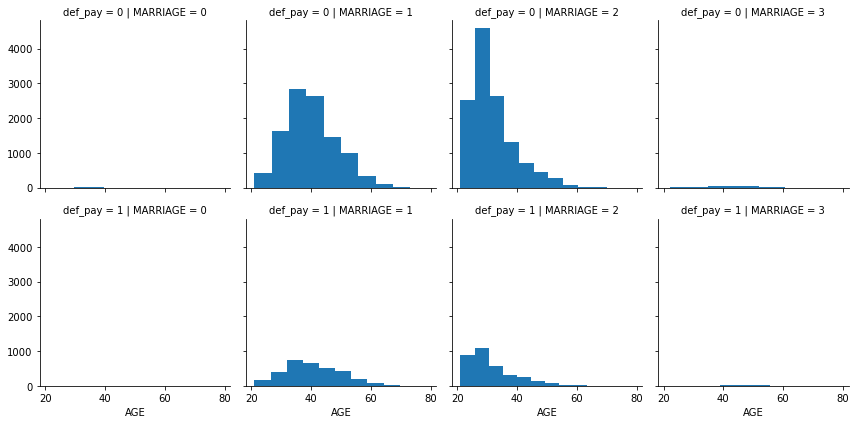

In [13]:
g = sns.FacetGrid(df, row='def_pay', col='MARRIAGE')
g = g.map(plt.hist, 'AGE')
plt.show()

Note: Marriage = 1 is married, marriage = 2 is single, and marriage = 0, 3 are unknown/other (ignoring these in this analysis) <br>
It looks like there are more young single people in the dataset than married. It appears that young single people are more likely to default than young married people, but this may just be because there are a higher number of single people in this age range than married people. The distribution is different for married/unmarried individuals, so it's a good variable to leave in the model. 

Let's see what the difference is between male and female borrowers:

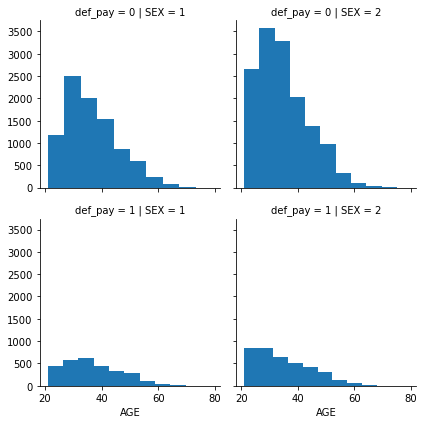

In [15]:
g = sns.FacetGrid(df, row='def_pay', col='SEX')
g = g.map(plt.hist, 'AGE')

Note: Sex = 1 is male, sex = 2 is female <br>
There are more female borrowers predicted to default on their loans, especially young female borrowers.

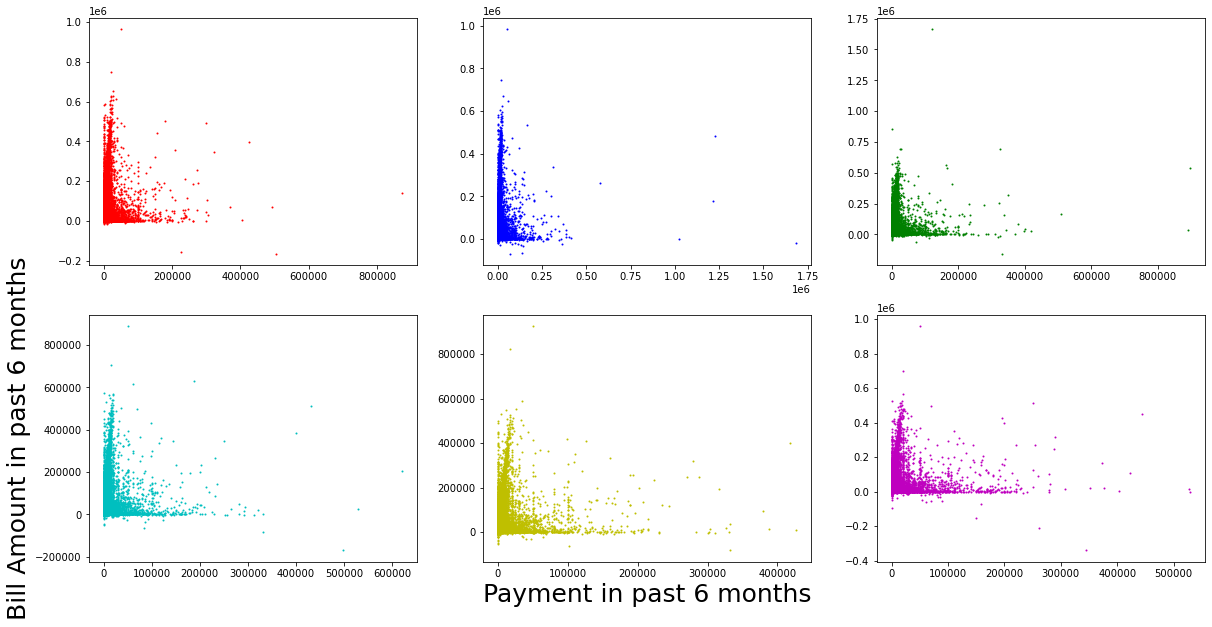

In [17]:
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='c', s=1)
plt.ylabel("Bill Amount in past 6 months", fontsize=25)

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='y', s=1)
plt.xlabel("Payment in past 6 months", fontsize=25)

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)

plt.show()

What we can see from these plots is that a lot of people have much larger balances than the payments they are making. It's hard to tell if this will have an effect on if they will default or not, but it will be interesting to see if it will!